In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import os
import pydicom as dcm

In [2]:
np.random.seed(42)

# Prepare dataset

In [3]:
data = pd.read_csv('img_features.csv')
data.head()

,Unnamed: 0,patientId,target,features
0,0,00436515-870c-4b36-a041-de91049b9ab4,1,"(115.08454608917236, 57.27438506263394, 529785..."
1,1,00704310-78a8-4b38-8475-49f4573b2dbb,1,"(92.81453704833984, 74.93762038175163, 498500,..."
2,2,00aecb01-a116-45a2-956c-08d2fa55433f,1,"(38.749732971191406, 51.14731838178627, 328949..."
3,3,00c0b293-48e7-4e16-ac76-9269ba535a62,1,"(104.95982074737549, 70.30975599712868, 487539..."
4,4,00f08de1-517e-4652-a04f-d1dc9ee48593,1,"(110.65030765533447, 58.128343368363296, 52948..."


In [4]:
feats = data.features.apply(lambda x: list(eval(x)))
dataset = pd.DataFrame(feats.values.tolist(), 
                        columns=['mean', 'stddev', 'area', 'perimeter', 'irregularity', 'equiv_diam', 'hu1', 'hu2', 'hu4', 'hu5', 'hu6'],
                       index=data.index)
dataset['label'] = data['target']
dataset.head()

,mean,stddev,area,perimeter,irregularity,equiv_diam,hu1,hu2,hu4,hu5,hu6,label
0,115.084546,57.274385,529785,32407,0.006339,821.305797,-0.696335,-0.728921,-1.362400,2.236605,1.441440,1
1,92.814537,74.937620,498500,33951,0.005435,796.686835,-0.786075,-1.156761,-2.400028,-4.945837,-2.787204,1
2,38.749733,51.147318,328949,23970,0.007195,647.171442,0.774458,3.230857,6.683296,-12.330389,-8.355217,1
3,104.959821,70.309756,487539,46348,0.002852,787.879391,-0.467874,1.008097,-0.448093,0.556280,0.581962,1
4,110.650308,58.128343,529486,58198,0.001964,821.074000,-0.557802,-0.909547,-0.956643,-1.975454,-1.398213,1


## Train test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('label', axis=1), dataset['label'],
                                                   test_size=0.4, stratify=dataset['label'])

## Train models

We evaluate on the following metrics
1. Accuracy
2. Precision
3. Recall
4. ROC AUC

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

def print_metrics(y_pred, y_train, yt_pred, y_test):
    print('Train data metrics:')
    print('Accuracy: ', accuracy_score(y_train, y_pred))
    print('Precison: ', precision_score(y_train, y_pred))
    print('Recall: ', recall_score(y_train, y_pred))
    print('F1 score: ', f1_score(y_train, y_pred))
    print('ROC AUC score: ', roc_auc_score(y_train, y_pred))
    print()
    print('Test data metrics:')
    print('Accuracy: ', accuracy_score(y_test, yt_pred))
    print('Precison: ', precision_score(y_test, yt_pred))
    print('Recall: ', recall_score(y_test, yt_pred))
    print('F1 score: ', f1_score(y_test, yt_pred))
    print('ROC AUC score: ', roc_auc_score(y_test, yt_pred))

### Logistic regression model

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_train), y_train, lr.predict(X_test), y_test)

/home/surya/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train data metrics:
Accuracy:  0.6616575081305371
Precison:  0.6520618556701031
Recall:  0.3507069586914333
F1 score:  0.4561023976924463
ROC AUC score:  0.6117941573118184

Test data metrics:
Accuracy:  0.6594349142280524
Precison:  0.65625
Recall:  0.3318087318087318
F1 score:  0.44076222038111024
ROC AUC score:  0.6068814910102682


### Random forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500, max_depth=8, min_samples_split=2,
                            n_jobs=-1)
rf.fit(X_train, y_train)

print_metrics(rf.predict(X_train), y_train, rf.predict(X_test), y_test)

Train data metrics:
Accuracy:  0.8262868677806438
Precison:  0.823178391959799
Recall:  0.726642639312448
F1 score:  0.7719039905757621
ROC AUC score:  0.8103081369820243

Test data metrics:
Accuracy:  0.781029263370333
Precison:  0.7627441638875655
Recall:  0.6656964656964657
F1 score:  0.7109236234458258
ROC AUC score:  0.7625291139552648


### Gradient boosting classifier

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01,
                               max_depth=7, min_samples_split=5)
gb.fit(X_train, y_train)

print_metrics(gb.predict(X_train), y_train, gb.predict(X_test), y_test)

Train data metrics:
Accuracy:  0.8907704384882809
Precison:  0.8916988991371616
Recall:  0.830884391461048
F1 score:  0.8602181400688863
ROC AUC score:  0.8811672428115033

Test data metrics:
Accuracy:  0.794820047090481
Precison:  0.7672530446549392
Recall:  0.7072765072765073
F1 score:  0.7360450021635656
ROC AUC score:  0.7807774798455397


### Support Vector Machines

In [10]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

print_metrics(svm.predict(X_train), y_train, svm.predict(X_test), y_test)

/home/surya/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train data metrics:
Accuracy:  1.0
Precison:  1.0
Recall:  1.0
F1 score:  1.0
ROC AUC score:  1.0

Test data metrics:
Accuracy:  0.5955264043054154
Precison:  0.0
Recall:  0.0
F1 score:  0.0
ROC AUC score:  0.5


/home/surya/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/surya/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_train), y_train, knn.predict(X_test), y_test)

Train data metrics:
Accuracy:  0.7262532241785353
Precison:  0.7089605734767025
Recall:  0.5483781535902412
F1 score:  0.6184148819759262
ROC AUC score:  0.6977295664373052

Test data metrics:
Accuracy:  0.7029936091490078
Precison:  0.675068493150685
Recall:  0.5122661122661123
F1 score:  0.5825059101654846
ROC AUC score:  0.6723996474914294


## Visualize the best model

/home/surya/miniconda3/envs/ml/lib/python3.7/site-packages/yellowbrick/classifier/base.py:250: YellowbrickWarning: both classes and encoder specified, using encoder
  "both classes and encoder specified, using encoder", YellowbrickWarning
/home/surya/miniconda3/envs/ml/lib/python3.7/site-packages/yellowbrick/classifier/base.py:250: YellowbrickWarning: both classes and encoder specified, using encoder
  "both classes and encoder specified, using encoder", YellowbrickWarning
/home/surya/miniconda3/envs/ml/lib/python3.7/site-packages/yellowbrick/classifier/base.py:308: YellowbrickWarning: both classes and encoder specified, using encoder
  "both classes and encoder specified, using encoder", YellowbrickWarning
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


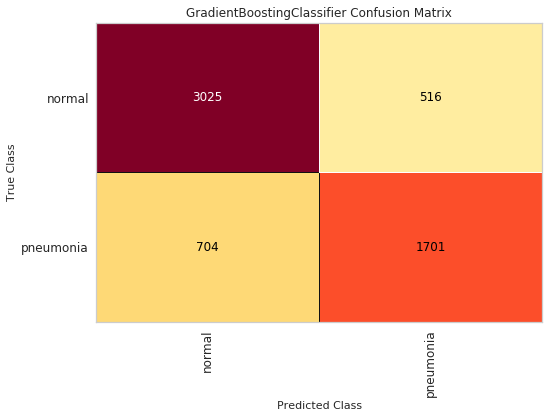

In [12]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(gb, classes=[0,1], 
                     encoder={0: 'normal', 1: 'pneumonia'})
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

### ROC

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


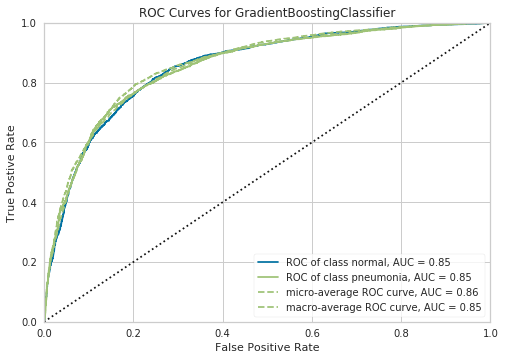

In [13]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(gb, classes=["normal", "pneumonia"])

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show()    

### Feature importance

Feature ranking:
1. feature 1 (0.207494)
2. feature 3 (0.156939)
3. feature 4 (0.138717)
4. feature 5 (0.100005)
5. feature 2 (0.095189)
6. feature 0 (0.082556)
7. feature 6 (0.069206)
8. feature 8 (0.053405)
9. feature 9 (0.033275)
10. feature 7 (0.032074)
11. feature 10 (0.031142)


(-1, 11)

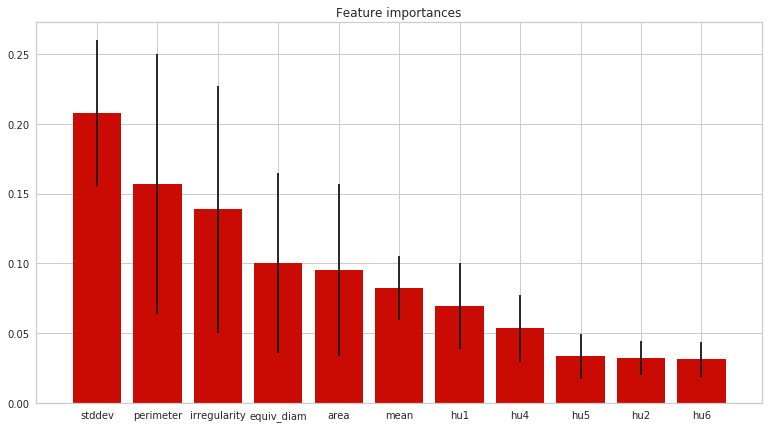

In [14]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(13,7))
plt.title("Feature importances")

plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])

# Predict with an image

### Functions

In [15]:
import skimage

In [16]:
PATH = 'imgs/'

def load_image(path):    
    patientImage = path + '.dcm'
    imagePath = os.path.join(PATH,"stage_2_train_images/", patientImage)
    img = dcm.read_file(imagePath).pixel_array
    return img

def imshow_gray(img):
    plt.figure(figsize=(12,7))
    return plt.imshow(img, cmap='gray')

def area(img):
    # binarized image as input
    return np.count_nonzero(img)

def perimeter(img):
    # edges of the image as input
    return np.count_nonzero(img)

def irregularity(area, perimeter):
    # area and perimeter of the image as input, also called compactness
    I = (4 * np.pi * area) / (perimeter ** 2)
    return I

def equiv_diam(area):
    # area of image as input
    ed = np.sqrt((4 * area) / np.pi)
    return ed

def get_hu_moments(contour):
    # hu moments except 3rd and 7th (5 values)
    M = cv2.moments(contour)
    hu = cv2.HuMoments(M).ravel().tolist()
    del hu[2]
    del hu[-1]
    log_hu = [-np.sign(a)*np.log10(np.abs(a)) for a in hu]
    return log_hu


def extract_features(img):
    mean = img.mean()
    std_dev = img.std()
    
    # hist equalization
    equalized = cv2.equalizeHist(img)
    
    # sharpening
    hpf_kernel = np.full((3, 3), -1)
    hpf_kernel[1,1] = 9
    sharpened = cv2.filter2D(equalized, -1, hpf_kernel)
    
    # thresholding
    ret, binarized = cv2.threshold(cv2.GaussianBlur(sharpened,(7,7),0),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # edge detection
    edges = skimage.filters.sobel(binarized)
    
    # moments from contours
    contours, hier = cv2.findContours((edges * 255).astype('uint8'),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    select_contour = sorted(contours, key=lambda x: x.shape[0], reverse=True)[0]
    
    
    # feature extraction
    ar = area(binarized)
    per = perimeter(edges)
    irreg = irregularity(ar, per)
    eq_diam = equiv_diam(ar)
    hu = get_hu_moments(select_contour)
    
    return (mean, std_dev, ar, per, irreg, eq_diam, *hu)

### Load images

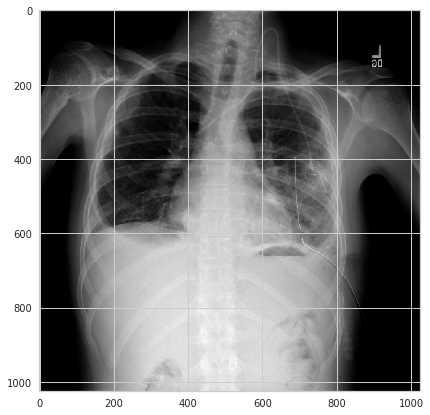

In [26]:
test_img = data[data['target']==1]['patientId'].sample(1)

img = load_image(test_img.values[0])
imshow_gray(img)

### Make prediction

In [22]:
feats = list(extract_features(img))

pred = gb.predict([feats])

if pred == 1:
    print('Patient is infected with pneumonia')
else:
    print('Patient is normal')

Patient is infected with pneumonia


### Test for noisy image

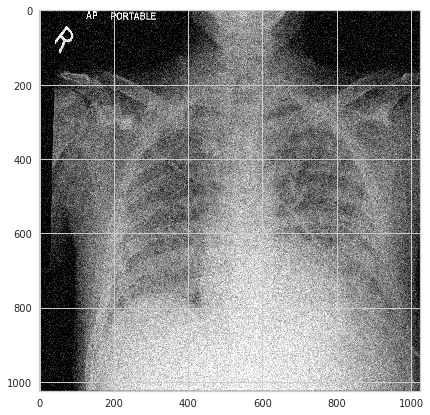

In [23]:
from skimage.util import random_noise

img = random_noise(img, mode='gaussian')
img = (img*255).astype('int')
imshow_gray(img)

In [24]:
feats = list(extract_features(img.astype('uint8')))

pred = gb.predict([feats])

if pred == 1:
    print('Patient is infected with pneumonia')
else:
    print('Patient is normal')

Patient is infected with pneumonia
